In [75]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import describe

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read in Data

In [2]:
train = pd.read_csv("../data/labeledTrainData.tsv", header = 0, delimiter = "\t", quoting=3)

In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
train.shape

(25000, 3)

In [58]:
test = pd.read_csv("../data/testData.tsv", header = 0, delimiter = '\t', quoting=3)
test.shape

(25000, 2)

# Data Cleaning


## removing markup

In [9]:
print(BeautifulSoup(train["review"][0]))

<html><head></head><body>"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br/><br/>Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br/><br/>The actual feature film bi

In [10]:
print(train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [11]:
print(BeautifulSoup(train["review"][0]).get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

## looking at punctuation

In [22]:
[w for w in re.sub("[^A-Za-z]", " ", BeautifulSoup(train["review"][0]).get_text()).lower().split() if w not in stopwords.words("english")]

[u'stuff',
 u'going',
 u'moment',
 u'mj',
 u'started',
 u'listening',
 u'music',
 u'watching',
 u'odd',
 u'documentary',
 u'watched',
 u'wiz',
 u'watched',
 u'moonwalker',
 u'maybe',
 u'want',
 u'get',
 u'certain',
 u'insight',
 u'guy',
 u'thought',
 u'really',
 u'cool',
 u'eighties',
 u'maybe',
 u'make',
 u'mind',
 u'whether',
 u'guilty',
 u'innocent',
 u'moonwalker',
 u'part',
 u'biography',
 u'part',
 u'feature',
 u'film',
 u'remember',
 u'going',
 u'see',
 u'cinema',
 u'originally',
 u'released',
 u'subtle',
 u'messages',
 u'mj',
 u'feeling',
 u'towards',
 u'press',
 u'also',
 u'obvious',
 u'message',
 u'drugs',
 u'bad',
 u'kay',
 u'visually',
 u'impressive',
 u'course',
 u'michael',
 u'jackson',
 u'unless',
 u'remotely',
 u'like',
 u'mj',
 u'anyway',
 u'going',
 u'hate',
 u'find',
 u'boring',
 u'may',
 u'call',
 u'mj',
 u'egotist',
 u'consenting',
 u'making',
 u'movie',
 u'mj',
 u'fans',
 u'would',
 u'say',
 u'made',
 u'fans',
 u'true',
 u'really',
 u'nice',
 u'actual',
 u'feature

## Review to Words

In [23]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

### test

In [24]:
clean_review = review_to_words( train["review"][0] )
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

## Prepare Training Data for Bag of Words

In [25]:
clean_train_reviews = []
nreviews = train["review"].size

for i in range():
    if i % 1000 == 0:
        print("Processing review {}/{}".format(i,nreviews))
    clean_train_reviews.append(review_to_words( train["review"][i] ))

In [26]:
len(clean_train_reviews)

25000

# Bag of Words

In [29]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)
train_data_features = vectorizer.fit_transform(clean_train_reviews)

In [34]:
train_data_features.toarray().shape

(25000, 5000)

In [35]:
vocab = vectorizer.get_feature_names()
print(vocab)

[u'abandoned', u'abc', u'abilities', u'ability', u'able', u'abraham', u'absence', u'absent', u'absolute', u'absolutely', u'absurd', u'abuse', u'abusive', u'abysmal', u'academy', u'accent', u'accents', u'accept', u'acceptable', u'accepted', u'access', u'accident', u'accidentally', u'accompanied', u'accomplished', u'according', u'account', u'accuracy', u'accurate', u'accused', u'achieve', u'achieved', u'achievement', u'acid', u'across', u'act', u'acted', u'acting', u'action', u'actions', u'activities', u'actor', u'actors', u'actress', u'actresses', u'acts', u'actual', u'actually', u'ad', u'adam', u'adams', u'adaptation', u'adaptations', u'adapted', u'add', u'added', u'adding', u'addition', u'adds', u'adequate', u'admire', u'admit', u'admittedly', u'adorable', u'adult', u'adults', u'advance', u'advanced', u'advantage', u'adventure', u'adventures', u'advertising', u'advice', u'advise', u'affair', u'affect', u'affected', u'afford', u'aforementioned', u'afraid', u'africa', u'african', u'afte

In [40]:
train_data_features.shape

(25000, 5000)

In [43]:
np.sum(train_data_features, axis=0)

matrix([[187, 125, 108, ..., 740, 518, 147]])

(0, 500)

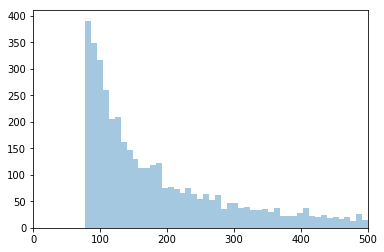

In [55]:
sns.distplot(np.sum(train_data_features, axis=0).flatten(), kde = False, bins = 5000)
plt.xlim(0,500)

## Random Forest

In [86]:
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, oob_score=True) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, train["sentiment"])

## testing

In [62]:
num_tests = test.shape[0]
clean_test_reviews = []

for i in range(num_tests):
    if i % 1000 == 0:
        print("Processing {} of {}".format(i, num_tests))
    clean_test_reviews.append(review_to_words(test["review"][i]))



Processing 0 of 25000
Processing 1000 of 25000
Processing 2000 of 25000
Processing 3000 of 25000
Processing 4000 of 25000
Processing 5000 of 25000
Processing 6000 of 25000
Processing 7000 of 25000
Processing 8000 of 25000
Processing 9000 of 25000
Processing 10000 of 25000
Processing 11000 of 25000
Processing 12000 of 25000
Processing 13000 of 25000
Processing 14000 of 25000
Processing 15000 of 25000
Processing 16000 of 25000
Processing 17000 of 25000
Processing 18000 of 25000
Processing 19000 of 25000
Processing 20000 of 25000
Processing 21000 of 25000
Processing 22000 of 25000
Processing 23000 of 25000
Processing 24000 of 25000


In [63]:
num_tests

25000

In [64]:
test_data_features = vectorizer.transform(clean_test_reviews).toarray()

In [65]:
test_predicts = forest.predict(test_data_features)

In [66]:
output = pd.DataFrame({"id":test["id"], "sentiment":test_predicts})

In [67]:
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [68]:
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

# More Exploring

In [87]:
forest.oob_score_

0.8286

In [89]:
print(describe(forest.feature_importances_))

DescribeResult(nobs=5000, minmax=(1.5384615384615394e-06, 0.02132388360642417), mean=0.00020000000000000001, variance=3.8614255043597667e-07, skewness=18.635009425192823, kurtosis=498.02940009128184)


In [88]:
fimp = forest.feature_importances_
np.array(vocab)[fimp > 0.002]

array([u'acting', u'also', u'amazing', u'annoying', u'avoid', u'awful',
       u'bad', u'beautiful', u'best', u'boring', u'could', u'crap',
       u'dull', u'even', u'excellent', u'fantastic', u'favorite', u'film',
       u'great', u'horrible', u'instead', u'lame', u'love', u'loved',
       u'minutes', u'money', u'movie', u'nothing', u'oh', u'perfect',
       u'plot', u'pointless', u'poor', u'poorly', u'ridiculous', u'script',
       u'stupid', u'supposed', u'terrible', u'waste', u'wasted', u'well',
       u'wonderful', u'worse', u'worst'],
      dtype='<U16')

In [91]:
fimp[fimp > 0.002]

array([ 0.00332565,  0.00277976,  0.00351788,  0.00256699,  0.00267912,
        0.00924722,  0.02132388,  0.00271264,  0.00651453,  0.00702291,
        0.00254953,  0.00311581,  0.00275091,  0.0035105 ,  0.00725437,
        0.00219698,  0.00247108,  0.0021245 ,  0.01201845,  0.00472795,
        0.0022865 ,  0.00302193,  0.00486241,  0.00277946,  0.00383754,
        0.00325506,  0.00334605,  0.00555522,  0.00245057,  0.00395655,
        0.00349438,  0.00201195,  0.00432118,  0.00396182,  0.00297226,
        0.00291055,  0.00512973,  0.00313172,  0.00640824,  0.01022773,
        0.00276974,  0.00333361,  0.00597668,  0.00637324,  0.01891924])